<a href="https://colab.research.google.com/github/Rishitha2805/Outbreak-Prediction-of-Covid-19-in-INDIA/blob/main/ML_Project_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline
# Manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10, 12
 
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
df = pd.read_csv('/content/Covid_Cases_dataset.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
dates=list(confirmed['Date'])
len(dates)

179

In [ ]:
Y_confirmed=list(confirmed.iloc[:,-1].values)
Y_deaths=list(deaths.iloc[:,-1].values)
Y_recovered=list(recovered.iloc[:,-1].values)

In [ ]:
# Y_confirmed
X=np.array([i for i in range(len(dates))]).reshape(-1,1)
Y_confirmed=np.array(Y_confirmed).reshape(-1,1)
Y_deaths=np.array(Y_deaths).reshape(-1,1)
Y_recovered=np.array(Y_recovered).reshape(-1,1)

In [ ]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-20]
# future_forecast

In [ ]:
# adjusted_dates
adjusted_dates=adjusted_dates.reshape(1,-1)[0]

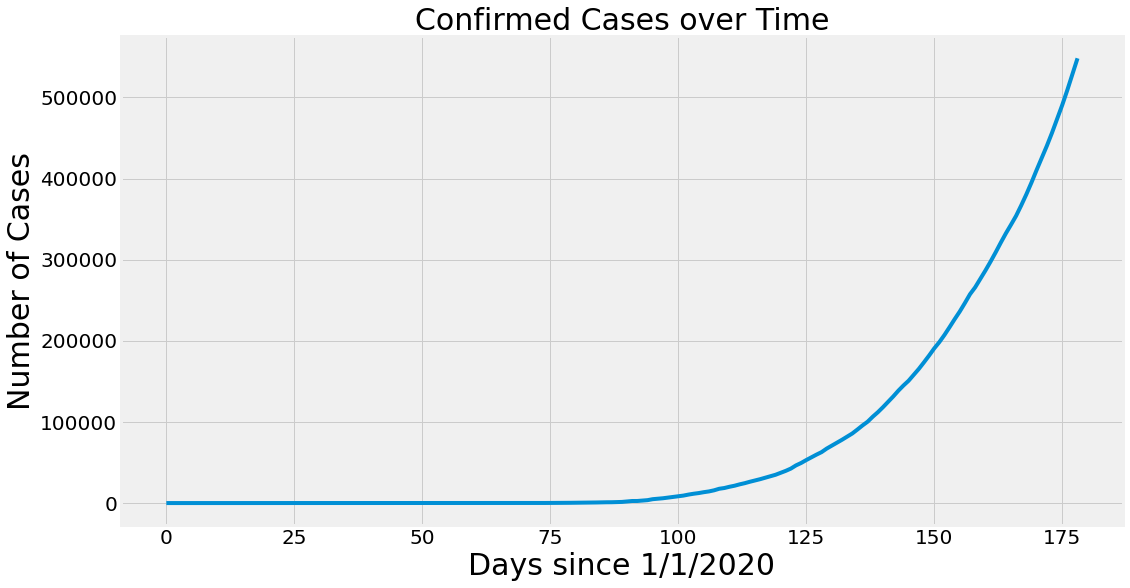

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

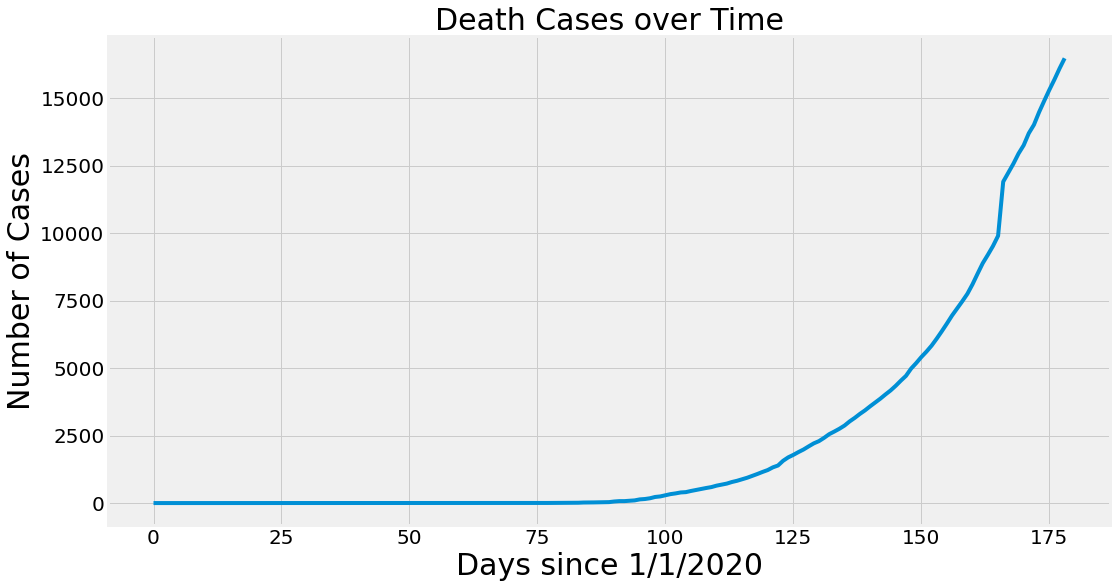

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.title('Death Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

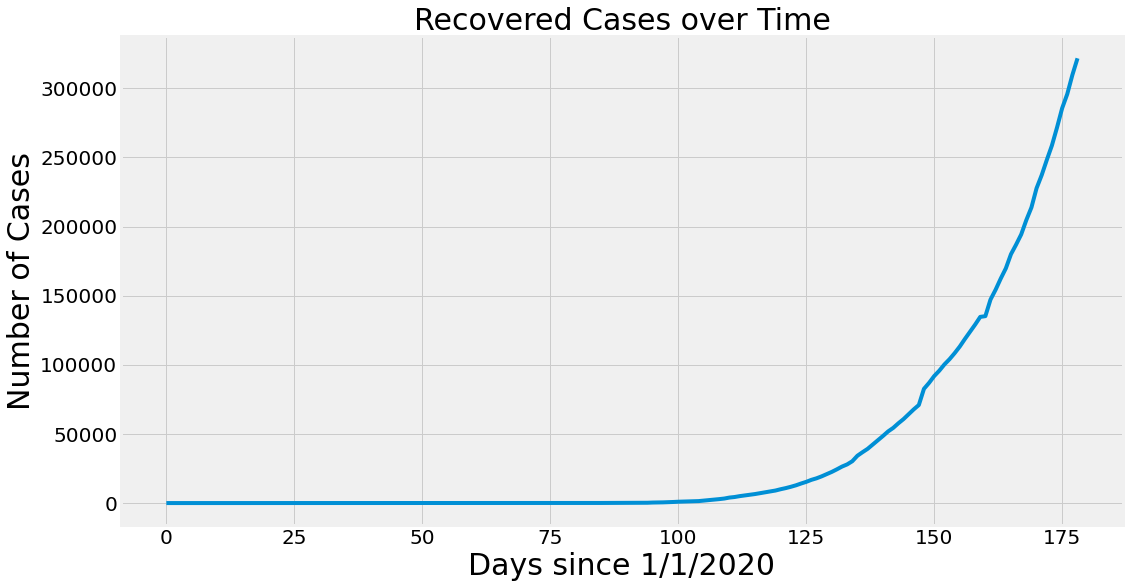

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.title('Recovered Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
# print(len(X),len(Y_confirmed))

In [ ]:
start='2020-01-01'
start_date=datetime.datetime.strptime(start,'%Y-%m-%d')
future_forecast_dates=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
# X[0] = pd.to_datetime(X[0], format='%Y-%m-%d')

# ***Confirmed***

In [ ]:
X_train_confirmed,X_test_confirmed,Y_train_confirmed,Y_test_confirmed=train_test_split(X,Y_confirmed,test_size=0.2)

In [ ]:
rf_confirmed=RandomForestRegressor(n_estimators=10,random_state=0)
rf_confirmed.fit(X_train_confirmed,Y_train_confirmed)
rf_pred=rf_confirmed.predict(future_forecast)

In [ ]:
rf_pred

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       3.000000e-01, 2.700000e+00, 6.000000e-01, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e-01, 9.000000e-01, 9.000000e-01, 9.000000e-01,
       2.000000e+00, 2.600000e+00, 3.000000e+00, 3.000000e+00,
       3.000000e+00, 3.000000e+00, 3.000000e+00, 3.000000e+00,
       3.000000e+00, 3.000000e+00, 3.000000e+00, 3.000000e+00,
       3.000000e+00, 3.000000e+00, 3.000000e+00, 3.000000e+00,
       3.000000e+00, 3.000000e+00, 3.000000e+00, 3.000000e+00,
       3.000000e+00, 3.000000e+00, 3.000000e+00, 3.000000e+00,
       3.000000e+00, 3.000000e+00, 3.000000e+00, 3.000000e+00,
       4.400000e+00, 1.210000e+01, 2.360000e+01, 2.9500

In [ ]:
rf_confirmed

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Root mean square error 3120.07448548909
Root mean absolute error 38.739371302189326


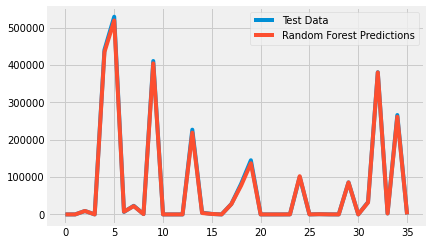

In [ ]:
rf_test_pred=rf_confirmed.predict(X_test_confirmed)
plt.plot(Y_test_confirmed)
plt.plot(rf_test_pred)
plt.legend(['Test Data','Random Forest Predictions'])
mse = math.sqrt(mean_squared_error(rf_test_pred, Y_test_confirmed)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(rf_test_pred, Y_test_confirmed)) 
print('Root mean absolute error', mae) 

In [ ]:
len(future_forecast_dates),len(rf_pred)

(199, 199)

In [ ]:
rf_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Naive Bayes Predicted # number of Confirmed cases in India':np.round(rf_pred[-20:])})
rf_df

,Date,Naive Bayes Predicted # number of Confirmed cases in India
0,2020-06-28,526780.0
1,2020-06-29,526780.0
2,2020-06-30,526780.0
3,2020-07-01,526780.0
4,2020-07-02,526780.0
5,2020-07-03,526780.0
6,2020-07-04,526780.0
7,2020-07-05,526780.0
8,2020-07-06,526780.0
9,2020-07-07,526780.0


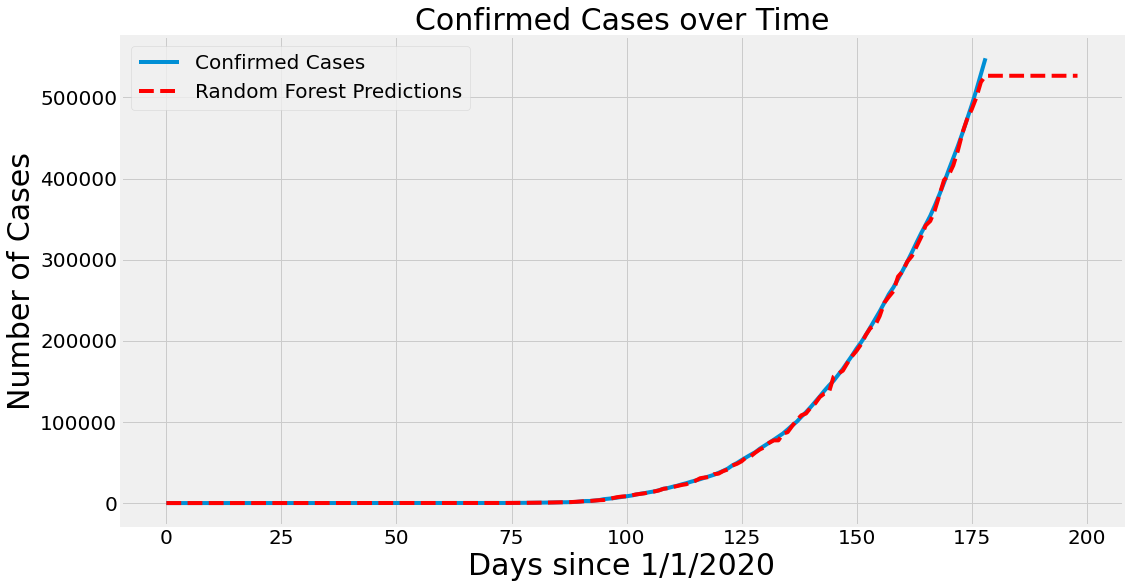

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.plot(future_forecast,rf_pred,linestyle='dashed',color='red')
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Random Forest Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# ***Deaths***

In [ ]:
X_train_deaths,X_test_deaths,Y_train_deaths,Y_test_deaths=train_test_split(X,Y_deaths,test_size=0.2)

In [ ]:
rf_deaths=RandomForestRegressor(n_estimators=10,random_state=0)
rf_deaths.fit(X_train_deaths,Y_train_deaths)
rf_pred=rf_deaths.predict(future_forecast)

Root mean square error 160.2853367175758
Root mean absolute error 9.212159838435767


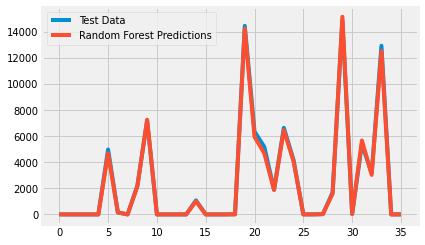

In [ ]:
rf_test_pred=rf_deaths.predict(X_test_deaths)
plt.plot(Y_test_deaths)
plt.plot(rf_test_pred)
plt.legend(['Test Data','Random Forest Predictions'])
mse = math.sqrt(mean_squared_error(rf_test_pred, Y_test_deaths)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(rf_test_pred, Y_test_deaths)) 
print('Root mean absolute error', mae) 

In [ ]:
rf_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Random Forest Predicted # number of Deaths in India':np.round(rf_pred[-20:])})
rf_df

,Date,Random Forest Predicted # number of Deaths in India
0,2020-06-28,16244.0
1,2020-06-29,16244.0
2,2020-06-30,16244.0
3,2020-07-01,16244.0
4,2020-07-02,16244.0
5,2020-07-03,16244.0
6,2020-07-04,16244.0
7,2020-07-05,16244.0
8,2020-07-06,16244.0
9,2020-07-07,16244.0


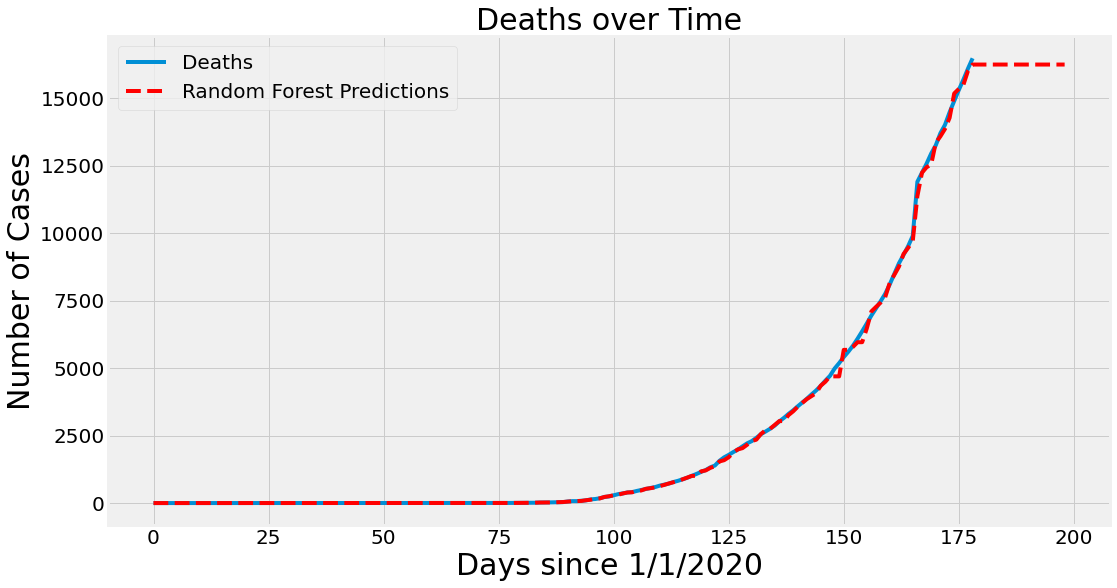

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.plot(future_forecast,rf_pred,linestyle='dashed',color='red')
plt.title('Deaths over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Deaths','Random Forest Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# ***Recovered***

In [ ]:
X_train_recovered,X_test_recovered,Y_train_recovered,Y_test_recovered=train_test_split(X,Y_recovered,test_size=0.2)

In [ ]:
rf_recovered=RandomForestRegressor(n_estimators=10,random_state=0)
rf_recovered.fit(X_train_recovered,Y_train_recovered)
rf_pred=rf_recovered.predict(future_forecast)

Root mean square error 3085.967109216601
Root mean absolute error 36.827940781724706


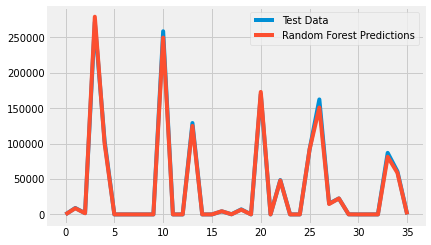

In [ ]:
rf_test_pred=rf_recovered.predict(X_test_recovered)
plt.plot(Y_test_recovered)
plt.plot(rf_test_pred)
plt.legend(['Test Data','Random Forest Predictions'])
mse = math.sqrt(mean_squared_error(rf_test_pred, Y_test_recovered)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(rf_test_pred, Y_test_recovered)) 
print('Root mean absolute error', mae) 

In [ ]:
rf_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Random Forest Predicted # number of Recovered cases in India':np.round(rf_pred[-20:])})
rf_df

,Date,Random Forest Predicted # number of Recovered cases in India
0,2020-06-28,316737.0
1,2020-06-29,316737.0
2,2020-06-30,316737.0
3,2020-07-01,316737.0
4,2020-07-02,316737.0
5,2020-07-03,316737.0
6,2020-07-04,316737.0
7,2020-07-05,316737.0
8,2020-07-06,316737.0
9,2020-07-07,316737.0


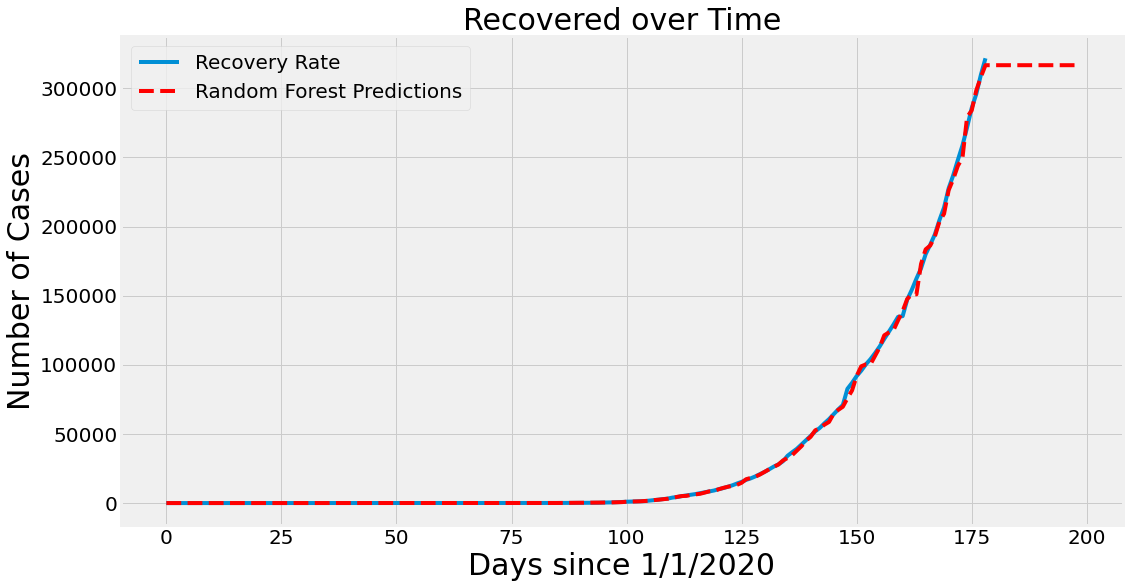

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.plot(future_forecast,rf_pred,linestyle='dashed',color='red')
plt.title('Recovered over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Recovery Rate','Random Forest Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()